# Question 2: Training and using materials models
**2.1 data cleaning and splitting**

In a Materials informatics workflow you need to find and clean data, featurize the data, train models, and use models for some task. A few years ago, we put together a nice series of notebooks that describe this process for an example where we train heat capacity data as a function of temperature and composition and then use this model to predict heat capacity as a function of temperature for new materials. The best practices document is a great starting point for you and can be found here `https://github.com/anthony-wang/BestPractices`. I'd like you to go through a similar exercise as the best practices notebook but with a few changes. 

**<font color='teal'>a)</font>** First, you'll notice that the original notebooks used `pandas-profiling` but this has been deprecated and replaced by ydata-profiling. Try to get ydata-profiling to work and then use it to inspect your data. 

In [1]:
# It works but the widget it porduces is not scrollable 
# and my computer slows down like crazy

#from ydata_profiling import ProfileReport
#import pandas as pd

#df=pd.read_csv('svm_df.csv')
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_widgets()

# using the _atomic_environment_features_binary combined with the density data
# results in a lot of data that is strongly correlated and redundant



**<font color='teal'>b)</font>** Second, in the data-splitting notebook, you'll see how we came up with an elaborate way to make sure tha as we split the data, we made sure that all the values corresponding to a formula went to either test, val, or train but would never be randomly split across these groups. We were silly and didn't know about `GroupKFold` in teh scikit-learn library. (`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html`) Redo the splitting process using this much simpler tool. 


In [2]:
#code goes here
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import sys

df=pd.read_csv('svm_df.csv')
X = df[['A_shortest_dist_count','B_shortest_dist_count','A_avg_shortest_dist_count','B_avg_shortest_dist_count',
        'A_shortest_tol_dist_count','B_shortest_tol_dist_count','A_avg_shortest_dist_within_tol_count',
        'B_avg_shortest_dist_within_tol_count','A_second_by_first_shortest_dist','B_second_by_first_shortest_dist',
        'A_avg_second_by_first_shortest_dist','B_avg_second_by_first_shortest_dist','A_second_shortest_dist_count',
        'B_second_shortest_dist_count','A_avg_second_shortest_dist_count','B_avg_second_shortest_dist_count',
        'A_homoatomic_dist_by_shortest_dist','B_homoatomic_dist_by_shortest_dist','A_avg_homoatomic_dist_by_shortest_dist',
        'B_avg_homoatomic_dist_by_shortest_dist','A_count_at_A_shortest_dist','A_count_at_B_shortest_dist',	
        'A_avg_count_at_A_shortest_dist','A_avg_count_at_B_shortest_dist','B_count_at_A_shortest_dist',
        'B_count_at_B_shortest_dist','B_avg_count_at_A_shortest_dist','B_avg_count_at_B_shortest_dist']]
y = df['Density']

#RNG_SEED = 42
#np.random.seed(seed=RNG_SEED)
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=RNG_SEED)
#sys.getsizeof(X)
print(X.shape)
print(y.shape)

group = list(range(len(X)))

gkf = GroupKFold(n_splits=5)
for train_index, test_index in gkf.split(X,groups=group):
    print("Train:", train_index, "Test:", test_index)
    X_train = X.iloc[train_index, :]
    y_train = y[train_index]
    X_test = X.iloc[test_index, :]
    y_test = y[test_index]
    



(97, 28)
(97,)
Train: [ 0  1  2  3  5  6  7  8 10 11 12 13 15 16 17 18 20 21 23 24 25 26 27 29
 30 31 32 34 35 36 37 39 40 41 42 44 45 46 47 48 50 51 52 53 55 56 57 58
 61 62 63 65 66 67 68 70 71 72 73 74 75 76 77 79 80 81 82 84 85 86 87 89
 90 91 92 94 95] Test: [ 4  9 14 19 22 28 33 38 43 49 54 59 60 64 69 78 83 88 93 96]
Train: [ 1  2  3  4  6  7  8  9 12 13 14 16 17 18 19 21 22 23 24 25 26 27 28 30
 31 32 33 35 36 37 38 40 41 42 43 45 46 48 49 51 52 53 54 56 57 58 59 60
 61 62 63 64 66 67 68 69 71 72 73 75 76 77 78 80 81 82 83 85 86 87 88 90
 91 92 93 95 96] Test: [ 0  5 10 11 15 20 29 34 39 44 47 50 55 65 70 74 79 84 89 94]
Train: [ 0  2  3  4  5  7  8  9 10 11 12 13 14 15 17 18 19 20 22 23 24 26 27 28
 29 31 32 33 34 36 37 38 39 41 42 43 44 47 48 49 50 52 53 54 55 57 58 59
 60 62 63 64 65 67 68 69 70 71 72 74 76 77 78 79 81 82 83 84 86 87 88 89
 91 92 93 94 95 96] Test: [ 1  6 16 21 25 30 35 40 45 46 51 56 61 66 73 75 80 85 90]
Train: [ 0  1  3  4  5  6  8  9 10 11 13 14 15 16 18

In [3]:
print(X_train)

    A_shortest_dist_count  B_shortest_dist_count  A_avg_shortest_dist_count  \
0                       6                      6                        6.0   
1                      12                     12                       12.0   
2                       2                     12                        2.0   
4                      12                     12                       12.0   
5                      12                     10                       12.0   
..                    ...                    ...                        ...   
90                      6                      4                        6.0   
91                     12                     12                       12.0   
93                     12                     10                       12.0   
94                      2                     12                        2.0   
96                     12                     12                       12.0   

    B_avg_shortest_dist_count  A_shortest_tol_dist_

**2.2 model training and hyper parameter tuning**

**<font color='teal'>c)</font>** Next, when we built our classic models, we never performed hyperparameter tuning! We just used them with default parameters. I'd like you to build two models and perform hyperparameter tuning on them. One model should be either `Ridge` or `Lasso` and the other should be `XGBoost`. Compare performance metrics including training time. 

the r2 score is 0.3156109488011992
the mean absolute error is 2.8193352016960556


Model score :  0.3156109488011992


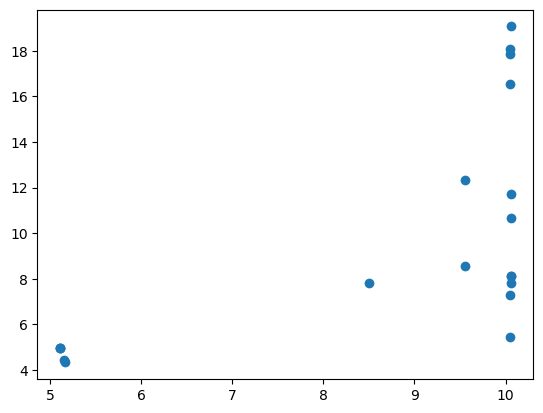

In [18]:
# Ridge
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

  
# training model with 0.5 alpha value 
model = Ridge(alpha = 0.5, tol = 0.001,
              solver ='auto', random_state = 42) 
model.fit(X_train, y_train) 
  
# predicting the y_test 
y_pred = model.predict(X_test) 
r2 = r2_score(y_test, y_pred)
print('the r2 score is',r2)
mae = mean_absolute_error(y_test, y_pred)
print('the mean absolute error is',mae)
rmse_val = mean_squared_error(y_test, y_pred, squared=False)

plt.scatter(y_pred,y_test)
  
# finding score for our model 
score = model.score(X_test, y_test) # model score is r^2 value
print("\n\nModel score : ", score) 



c:\Miniconda3\envs\MatInformatics\lib\site-packages\xgboost\core.py:160: UserWarning: [17:07:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


the r2 score is 0.14222260853832014
the mean absolute error is 3.090598228473416


Model score :  0.14222260853832014


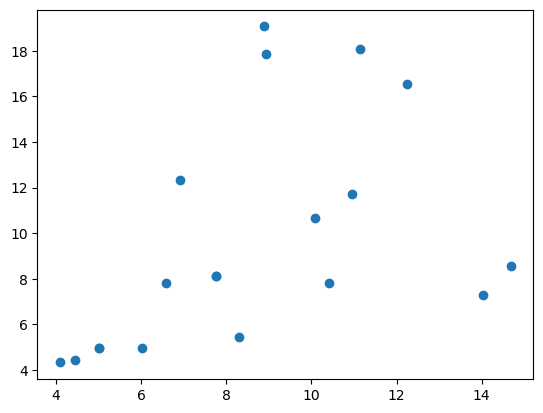

In [17]:
# XGBoost
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Use "hist" for training the model.
reg = xgb.XGBRegressor(tree_method="hist", device="cuda")
# Fit the model using predictor X and response y.
reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('the r2 score is',r2)
mae = mean_absolute_error(y_test, y_pred)
print('the mean absolute error is',mae)
rmse_val = mean_squared_error(y_test, y_pred, squared=False)

plt.scatter(y_pred,y_test)

score = reg.score(X_test, y_test)
print("\n\nModel score : ", score)

# Save model into JSON format.
#reg.save_model("regressor.json")


**2.3 using your model to make predictions**

**<font color='teal'>c)</font>** Finally, pick the best model from **2.2** and use it to predict the heat capacity from 1200K to 2000K for ZrN. See how it compares to experiment. 

![ZrN Cp](https://www.researchgate.net/publication/335403917/figure/fig2/AS:796198449467394@1566839911338/High-temperature-heat-capacity-Cp-of-zirconium-and-hafnium-carbides-and-carbonitrides.png)


In [6]:
#your code goes here